# CarND Andvanced Lane Lines
this project goal is 
> 
 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
 2. Apply a distortion correction to raw images.
 3. Use color transforms, gradients, etc., to create a thresholded binary image.
 4. Apply a perspective transform to rectify binary image ("birds-eye view").
 5. Detect lane pixels and fit to find the lane boundary.
 6. Determine the curvature of the lane and vehicle position with respect to center.
 7. Warp the detected lane boundaries back onto the original image.
 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position


## Caliration and Distortion Coefficients

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline
#%matplotlib qt
import os
#defint value
nx = 9 # number of inside cornets in x
ny = 6  # number of inside corners in y
camera_cal_path = "./camera_cal/"
#load data
image_list = []
file_list = os.listdir(camera_cal_path)
image = cv2.imread(file_list[0])
for file in file_list:
    image_list.append(cv2.imread(camera_cal_path+file))
# gray the image 
image_gray_list = []
for image in image_list:
    image_gray_list.append(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
 # calibrate Camera effiecients
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2)
img_points = []
obj_points = []
for gray in image_gray_list:
    ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret:
            img_points.append(corners)
            obj_points.append(objp)
ret,mtx,dist,revcs,tvecs = cv2.calibrateCamera(obj_points,img_points,image_gray_list[0].shape[::-1],None,None)
print(mtx)
#cv2.draw
#plt.imshow(cv)

[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


## Undistort

origin image


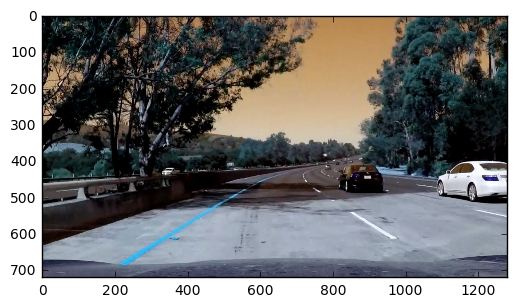

In [5]:
#%matplotlib inline
%matplotlib qt
img = cv2.imread("./test_images/test5.jpg")
img_size = img.shape[::-1]
# undistort the image
def getUndistortImage(img):
    undistort = cv2.undistort(img,mtx,dist,None,mtx)
    return undistort
print("origin image")
plt.imshow(img)
plt.show()







undistort  image 


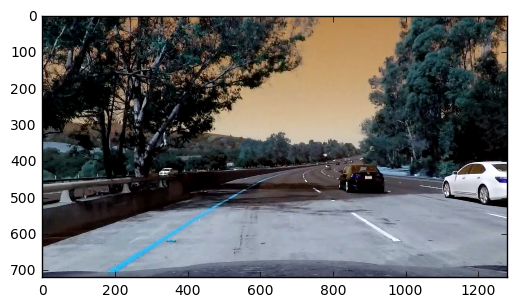

darw  the selected point in image


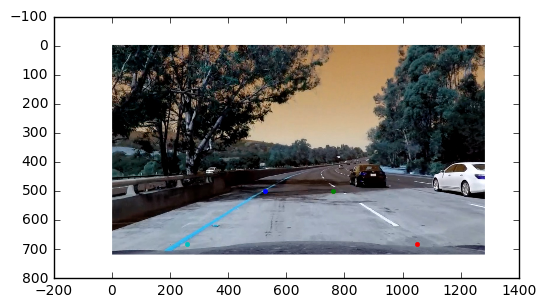

perspecitve image:


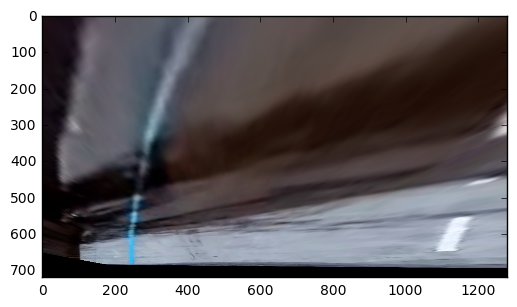

In [6]:
%matplotlib inline

undistort_image= getUndistortImage(img)
print("undistort  image ")
plt.imshow(undistort_image)
plt.show()
#get birds view
def getPerspectiveImage(image,source):
    offset = 0#100
    img_size = (image.shape[1],img.shape[0])
   # dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
    #                               [img_size[0]-offset, img_size[1]-offset], 
     #                             [offset, img_size[1]-offset]])    
    #dst= np.float32([[[200,440],[1100,440],[1100,660],[200,660]]])
    dst= np.float32([[[260,560],[1050,440],[1050,680],[260,680]]])
    #print("point  image ")
    M = cv2.getPerspectiveTransform(source,dst)
    warped = cv2.warpPerspective(image, M,img_size)
    return warped
#src = np.float32([[0,0],[1200,0],[1200,700],[0,700]])
src = np.float32( [[526,500],[760,500],[1050,680],[260,680]])
#src = np.float32( [[400,440],[1200,440],[1200,660],[400,660]])
print("darw  the selected point in image")
plt.imshow(undistort_image)
for i in range(4):
    plt.plot(src[i][0],src[i][1],'.')
plt.show()

warped_image = getPerspectiveImage(undistort_image,src)
print("perspecitve image:")
plt.imshow(warped_image)
plt.show()

## grayscale image
## sobel for gradient
## color channel


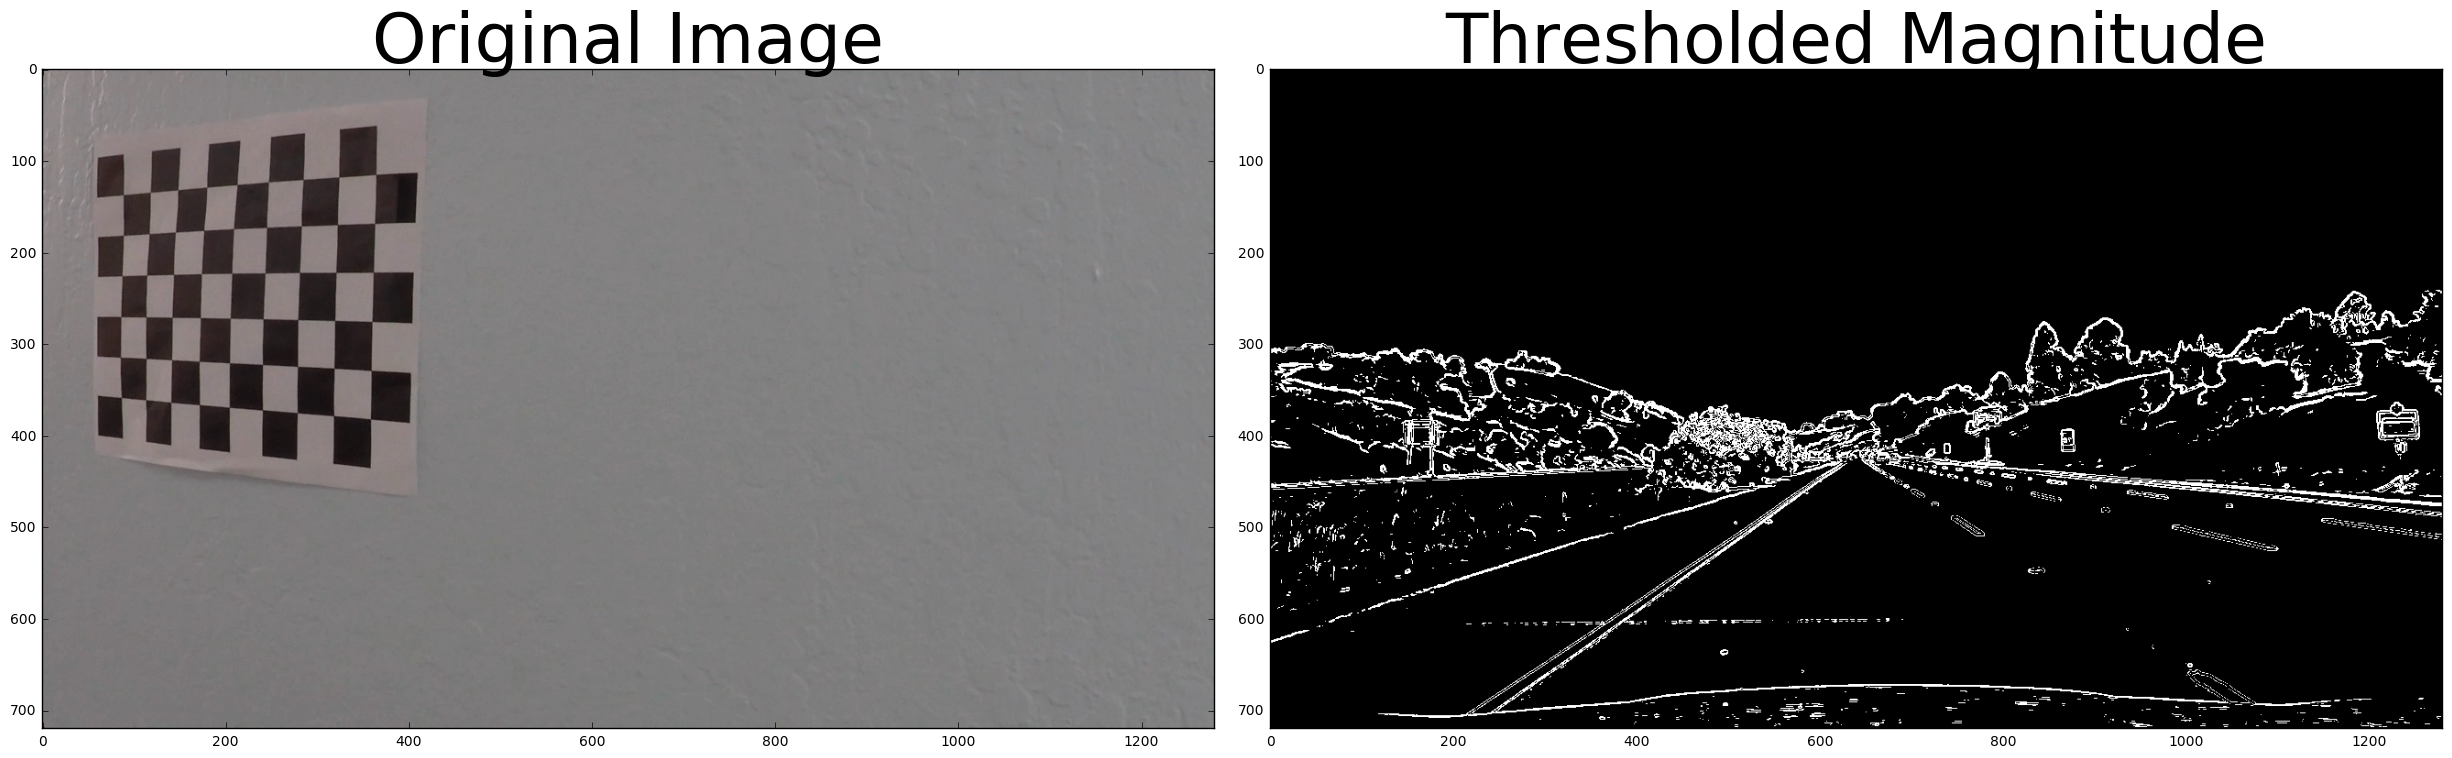

/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [5]:
#abs_sobelx = np.absolute(sobelx)
#abs_sobely = np.absolute(sobely)

def mag_thresh(img,sobel_kernel =3,mag_thresh =(0,255)):
        # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    sobelY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelX**2 + sobelY**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    #scaled_sobel = np.uint8(gradmag/scale_factor)
    scaled_sobel = (gradmag/scale_factor).astype(np.uint8) 
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

mag_binary = mag_thresh(undistort_image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistort_image)
Ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.show()
    
    

